# BERT sentence grammar classification

##Data exploration

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv", sep = ';', encoding = 'latin1', names = ["sentence", "labels"])

df.head()

,sentence,label
0,"Our friends won't buy this analysis, let alone...",1
1,One more pseudo generalization and I'm giving up.,1
2,One more pseudo generalization or I'm giving up.,1
3,"The more we study verbs, the crazier they get.",1
4,Day by day the facts are getting murkier.,1


In [3]:
df.info()  # We have 0 non-null values, which saves us time to replace null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8551 entries, 0 to 8550
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  8551 non-null   object
 1   label     8551 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 133.7+ KB


In [4]:
column_length = df['sentence'].apply(lambda x: len(x.split()))
print("Maximum sentence length:", column_length.max())         # There are very short and long sentences in the dataset
print("Minimum sentence length:", column_length.min())

Maximum sentence length: 42
Minimum sentence length: 2


### Label 0 means that the sentence is grammatically correct and 1 otherwise

In [5]:
df.groupby('label').describe()

sentence                                                               
         count unique                                                top freq
label                                                                        
0         2528   2527                           Jennifer craned her arm.    2
1         6023   6016  Smith loaned, and his widow later donated, a v...    2

#### Sentence length distribution

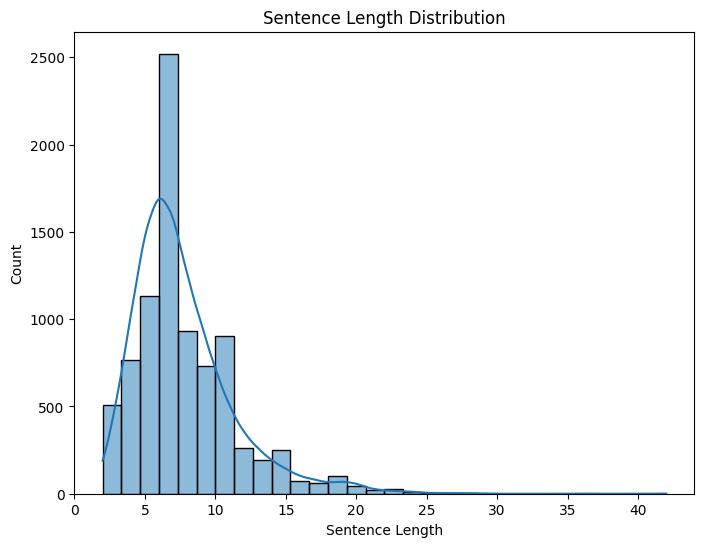

In [6]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(column_length, bins=30, kde=True)
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.show()

####Frequency of words in correct and incorrect sentences

In [7]:
bad_sentences = df[df['label'] == 1]['sentence']
correct_sentences = df[df['label'] == 0]['sentence']
mistaking_words = ' '.join(bad_sentences)
good_words = ' '.join(correct_sentences)

mistaking_words_freq = pd.Series(mistaking_words.split()).value_counts()      # Frequency of correct sentences' words
good_words_freq = pd.Series(good_words.split()).value_counts()        # Frequency of the words of incorrect sentences' words

In [8]:
print("The most frequent words in correct sentences:\n", good_words_freq.head())
print("The most frequent words in incorrect sentences:\n", mistaking_words_freq.head())

The most frequent words in correct sentences:
 the    1170
to      670
The     416
a       382
I       367
Name: count, dtype: int64
The most frequent words in incorrect sentences:
 the    2947
to     1408
The     925
a       873
I       845
Name: count, dtype: int64


(-0.5, 799.5, 399.5, -0.5)

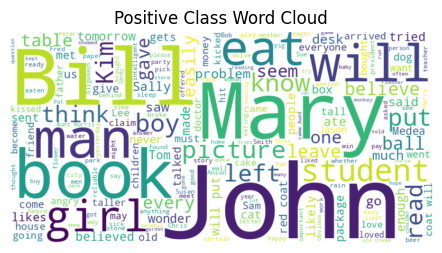

In [9]:
from wordcloud import WordCloud
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(good_words)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Class Word Cloud')
plt.axis('off')

####Class distribution

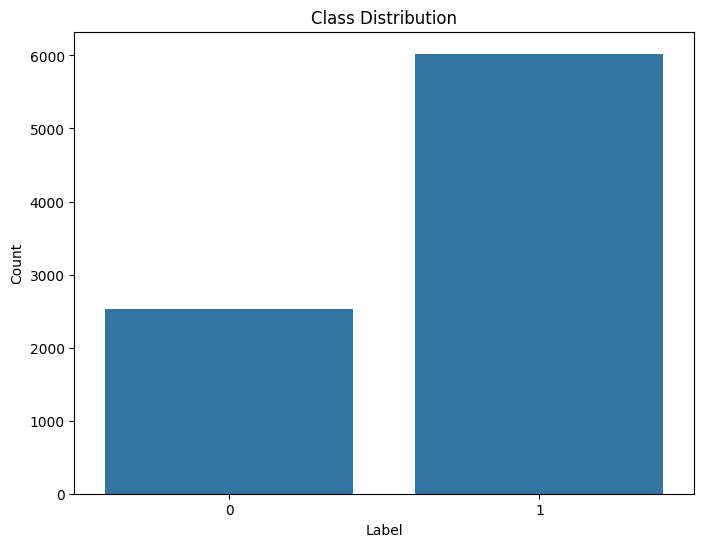

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data = df)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

#### I conclude that grammatically correct sentences are about **29.5%** of the dataset, which isn't good since it indicates **class imbalance**, and the model could go astray and yields bad predictions or False Positives and False Negatives, since we will want also to predict correct sentences. Models bias heavily toward the majority class, overlooking minority examples critical to many use cases. Thus, we will